### An official sample

In [1]:
import string

[-0.27071232  0.25052782  0.56714366 -0.15367595 -1.22621585 -0.56965394
 -0.77063171 -1.03285925 -0.60977801  1.49267884]
(2,)
x_sax:  (30, 2)
input: (30, 2)
bins: (11,)


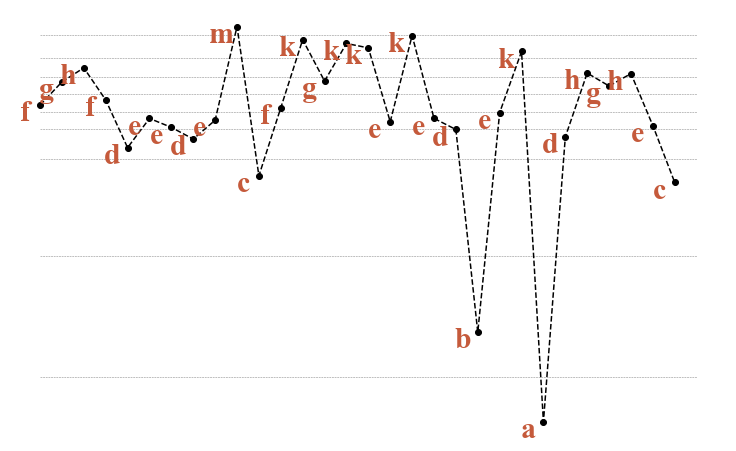

In [15]:
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
# sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
# # sax = SymbolicFourierApproximation(n_coefs=5)
# X_sax = sax.fit_transform(X)
# bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])
# print(bins.shape)
# import matplotlib
# font = {'family' : 'Times',
#         'size'   : 10}
# matplotlib.rc('font', **font)
plt.rc('font',family='Times New Roman')
    
# Parameters
n_timestamps, n_samples  = 30, 2
rng = np.random.RandomState(41)
X = rng.randn(n_timestamps, n_samples)
anomaly = np.zeros(n_timestamps)
anomaly[23] = -9
anomaly[20] = -5.5
X[:,0]= X[:,0] + anomaly

# #
# ranges = anomaly_ranges(data_dict["test_labels"])
# X = data_dict["test"][ranges[0,0]-500: ranges[0, 1]+500, :]
# n_timestamps, n_samples = X.shape
# sub_label = data_dict["test_labels"][ranges[0,0]-500: ranges[0, 1]+500]


est = MinMaxScaler()
print(X[0:10, 0])
X = est.fit_transform(X)

test_idx = 0
n_bins = 10

est = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="kmeans")
X_sax = est.fit_transform(X)
bins = est.bin_edges_[0]
bins = np.concatenate([[-np.inf], est.bin_edges_[0][1:-1], [np.inf]])

print(est.bin_edges_.shape)
print("x_sax: ", X_sax.shape)
print("input:", X.shape) # Discretizer will be done in columns
print("bins:", est.bin_edges_[0].shape)

# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] >= X_sax[:-1, 0]]
number2char = {idx: ch for idx, ch in enumerate([item for item in string.ascii_lowercase if item not in ["i", "j", "l"]])}

# ax = plt.figure()
w = 8
fig, ax = plt.subplots(1, figsize=(w*1.618, w))
# ax = ax[0]
ax.plot(X[:, test_idx], 'o--', label='Original', c="black")
for x, y, s in zip(range(n_timestamps), X[:, test_idx], X_sax[:, test_idx]):
    s = number2char[int(s)]
#     va = 'bottom' if bottom else 'top'
    va = 'top'
    ax.text(x-0.7, y-0.04, s, ha='center', fontsize=30, color='#c55a3b')
ax.hlines(bins, 0, n_timestamps, color='grey', linestyles='--', linewidth=0.5)

plt.axis('off')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

plt.savefig("symbolization.pdf", bbox_inches='tight')
# sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
#                            label='SAX - {0} bins'.format(n_bins))
# first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
# ax = plt.gca().add_artist(first_legend)
# plt.legend(loc=(0.81, 0.93), fontsize=8)
# plt.xlabel('Time', fontsize=14)
# plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()

In [9]:
print(list(map(lambda x: number2char[x], X_sax[:, test_idx])))

['f', 'g', 'h', 'f', 'd', 'e', 'e', 'd', 'e', 'm', 'c', 'f', 'k', 'g', 'k', 'k', 'e', 'k', 'e', 'd', 'b', 'e', 'k', 'a', 'd', 'h', 'g', 'h', 'e', 'c']


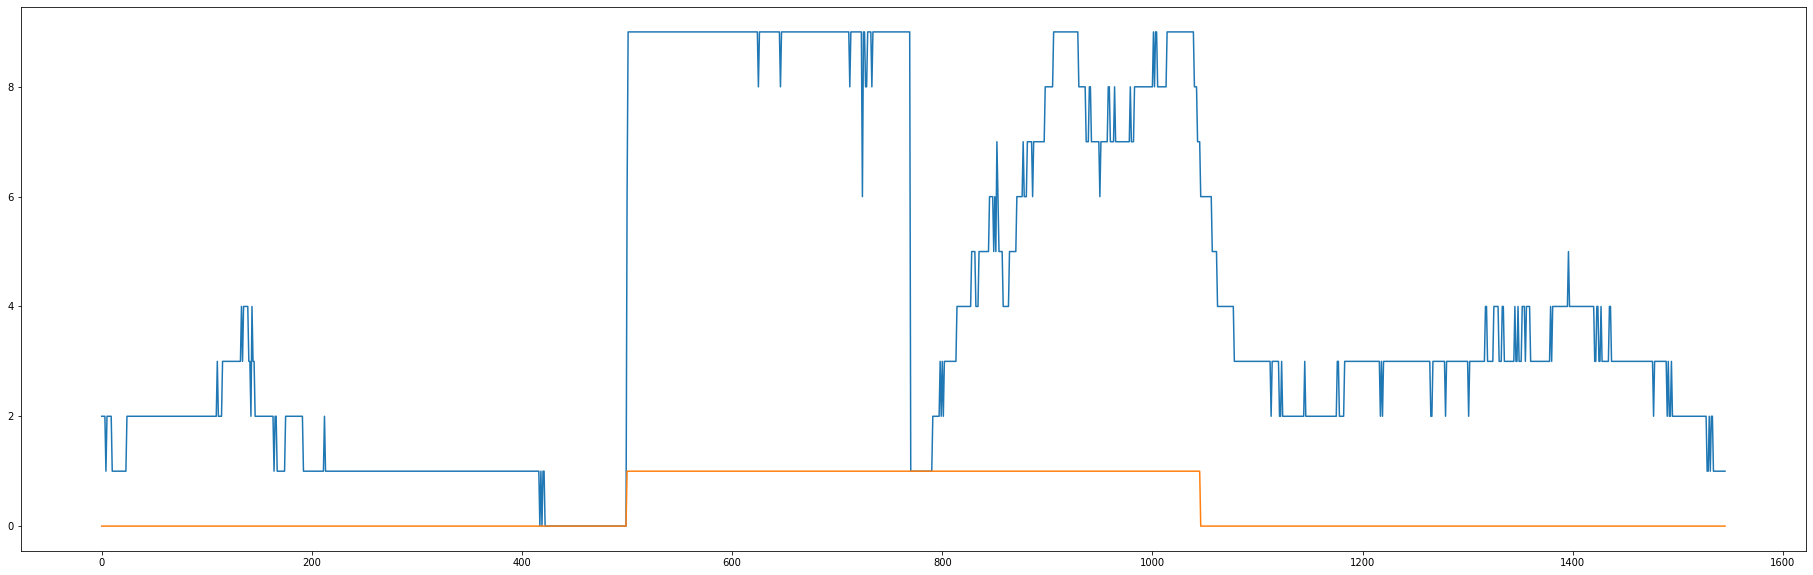

In [209]:
plt.figure(figsize=(32, 10))
plt.plot(X_sax[:,0].reshape(-1))
plt.plot(sub_label)

In [42]:
X = [[-2, 1, -4,   -1, -1],
      [-1, 2, -3, -0.5, -1],
      [ 0, 3, -2,  0.5, 2],
      [ 1, 4, -1,    2, 3]]
est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
est.

### SMD dataset testing


In [182]:
import sys
import logging
sys.path.append("../")

In [183]:
from common.dataloader import load_dataset
from common import data_preprocess

In [184]:
dataset = "SMD"
subdataset = "machine-1-1"
data_dict = load_dataset(dataset, subdataset)
normalize = "minmax"
pp = data_preprocess.preprocessor()
data_dict = pp.normalize(data_dict, method=normalize)

.././datasets/anomaly/SMD/processed/machine-1-1_train.pkl
Shape of train is (28479, 38).
Shape of test is (28479, 38).
Shape of test_labels is (28479,).
Normalizing data


(28479, 38)

In [174]:
x_train = data_dict["train"]
x_test = data_dict["test"]
x_test_labels = data_dict["test_labels"]

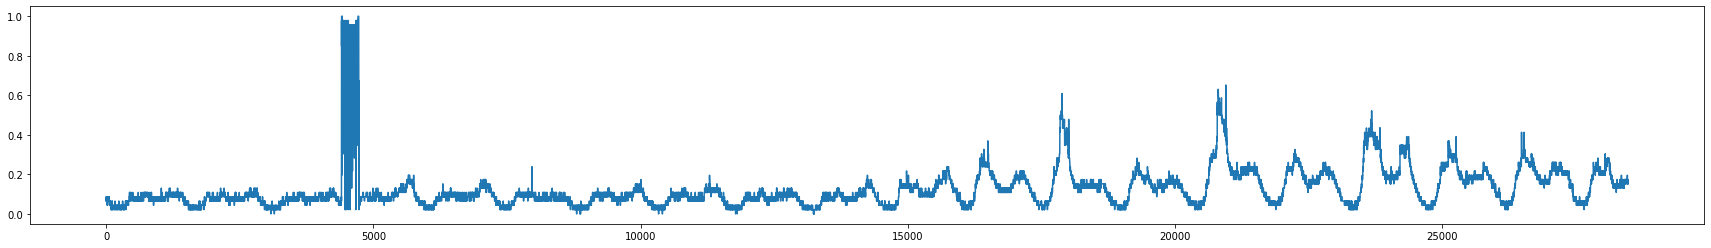

In [203]:
ts = x_train[:,0]
plt.figure(figsize=[30,4])
plt.plot(ts)

In [212]:
ts = x_train[:,0].reshape(1, -1)
transformer = SymbolicAggregateApproximation(n_bins=26)
X_SAX = transformer.fit_transform(ts)

transformer = SymbolicFourierApproximation(n_bins=26)
X_SFA = transformer.fit_transform(ts.reshape(-1, 1))

transformer = MultipleCoefficientBinning(n_bins=26)
X_MCB = transformer.fit_transform(ts.reshape(-1, 1))


/Users/liujinyang/anaconda3/envs/python36/lib/python3.6/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))


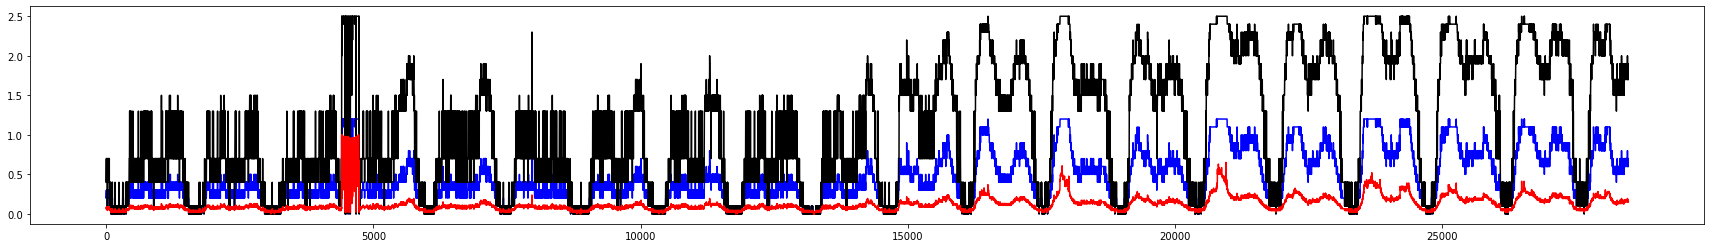

In [227]:
import string
symb_mapping = {ch: idx/10 for idx, ch in enumerate(list(string.ascii_lowercase))}
X_SFA_int = [symb_mapping[ch] for ch in X_SFA.reshape(-1)]
X_SAX_int = [symb_mapping[ch] for ch in X_SAX.reshape(-1)]
X_MCB_int = [symb_mapping[ch] for ch in X_MCB.reshape(-1)]
plt.figure(figsize=[30,4])
plt.plot(X_SAX_int, c="blue")
plt.plot(X_MCB_int, c="black")
# plt.plot(X_SFA_int, c="green")
plt.plot(ts.reshape(-1), c="r")

In [191]:
from pyts.approximation import MultipleCoefficientBinning
n_bins = 26
sax = MultipleCoefficientBinning(n_bins=5)
X_sax = sax.fit_transform(x_train.T)

ValueError: At least two consecutive quantiles are equal. Consider trying with a smaller number of bins or removing timestamps with low variation.

In [164]:
set(X_sax[0])

{'c', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 's', 't', 'u'}

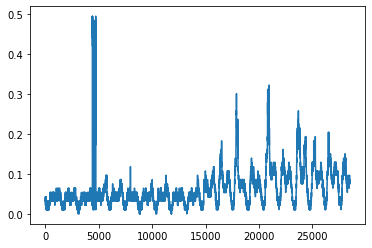

In [169]:
plt.plot(x_train.T[0])

In [77]:
x_train.T.shape

(38, 28479)

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_basic_motions
from pyts.multivariate.transformation import WEASELMUSE
from sklearn.preprocessing import LabelEncoder
from pyts.approximation import SymbolicFourierApproximation
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)
transformer = SymbolicFourierApproximation(n_bins=10)
X_new = transformer.fit_transform(X)

In [158]:
X[0]

array([-0.6478854 , -0.64199155, -0.63818632, -0.63825875, -0.63834515,
       -0.63869741, -0.64304876, -0.64376789, -0.64504991, -0.64711823,
       -0.64915334, -0.65124584, -0.65729046, -0.66220082, -0.66123227,
       -0.66098661, -0.66156196, -0.66225552, -0.66191228, -0.66274039,
       -0.66093438, -0.66344985, -0.66219448, -0.6623359 , -0.66171176,
       -0.66139185, -0.66140829, -0.66144719, -0.66037322, -0.65910828,
       -0.65974177, -0.65817648, -0.65839527, -0.65734763, -0.65851971,
       -0.6584864 , -0.657366  , -0.65435815, -0.65251819, -0.6513159 ,
       -0.64814481, -0.64733294, -0.64709792, -0.64486153, -0.64360412,
       -0.64349171, -0.64265061, -0.6420974 , -0.64447929, -0.6488921 ,
       -0.65765851, -0.66120325, -0.64966432, -0.61016844, -0.53743483,
       -0.46503123, -0.35853483, -0.28313648, -0.17744604,  0.15824648,
        0.35028455,  0.48241039,  0.60380734,  0.79710411,  0.98755132,
        1.2037853 ,  1.4065415 ,  1.5962459 ,  1.7128307 ,  1.77

In [159]:
X_new[0]

array(['e', 'i', 'i', 'h', 'a', 'd', 'i', 'f', 'h', 'e', 'a', 'g', 'j',
       'e', 'e', 'b', 'e', 'j', 'd', 'c', 'e', 'c', 'g', 'e', 'b', 'j',
       'f', 'a', 'g', 'e', 'f', 'f', 'b', 'c', 'i', 'f', 'a', 'c', 'h',
       'j', 'e', 'a', 'c', 'j', 'j', 'c', 'a', 'a', 'j', 'j', 'a', 'b',
       'h', 'g', 'j', 'd', 'a', 'c', 'i', 'j', 'j', 'a', 'a', 'i', 'j',
       'h', 'a', 'a', 'g', 'j', 'i', 'a', 'a', 'c', 'j', 'j', 'a', 'a',
       'i', 'j', 'i', 'd', 'a', 'b', 'i', 'h', 'a', 'b', 'c', 'j', 'j',
       'c', 'a', 'b', 'i', 'j', 'd', 'a', 'g', 'e', 'h', 'h', 'a', 'd',
       'j', 'c', 'g', 'h', 'a', 'g', 'j', 'b', 'b', 'c', 'a', 'j', 'j',
       'a', 'g', 'b', 'a', 'j', 'j', 'a', 'j', 'a', 'a', 'j', 'a', 'a',
       'j', 'a', 'a', 'j', 'a', 'c', 'j', 'a', 'a', 'j', 'a', 'i', 'j',
       'a', 'a', 'j', 'b', 'j', 'j', 'a'], dtype='<U1')

In [1]:
import torch

In [4]:
indices = torch.Tensor(10,10).random_(1, 24)
# indices.shape => torch.Size([1, 1, 128, 128, 128])
# indices.dtype => torch.float32

n = 24
one_hot = torch.nn.functional.one_hot(indices.to(torch.int64), n)

In [11]:
test = indices[0].numpy()

In [13]:
test

array([ 3., 22., 22., 14., 12.,  4., 23.,  5., 15.,  4.], dtype=float32)

In [16]:
import numpy as np
a = np.zeros(26)

In [19]:
a[test.astype(int)]=1

In [21]:
y = torch.zeros(26)
y_indice = [1,3,4]
# y_indice = list(map(lambda x: self.vocab.label2idx[x], self.windows[idx, -1, :]))
y[y_indice] = 1

In [22]:
y

tensor([0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
mlb = MultiLabelBinarizer()
mlb.fit_transform([test])

array([[1, 1, 1, 1, 1, 1, 1, 1]])

In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# test = pd.Series([['a', 'b', 'e'], ['c', 'a'], ['d'], ['d'], ['e']])


res = pd.DataFrame(,
                   columns=mlb.classes_,
                   index=test.index)

TypeError: 'numpy.float32' object is not iterable

In [1]:
import dgl
import torch

Using backend: pytorch


In [2]:
g = dgl.graph(([0, 1, 2, 3, 4], [1, 2, 3, 4, 0]))  # 5-node cycle
g.edata['w'] = torch.arange(10).view(5, 2)
sg = dgl.in_subgraph(g, [2, 0])

In [3]:
sg.edges()

(tensor([1, 4]), tensor([2, 0]))

In [4]:
sg.nodes()

tensor([0, 1, 2, 3, 4])

In [8]:
dgl.graph(([4,5], [2,4])).in_edges([1, 4])

(tensor([5]), tensor([4]))

In [93]:
def point_adjustment(pred, label):
    """
    Borrow from https://github.com/NetManAIOps/OmniAnomaly/blob/master/omni_anomaly/eval_methods.py
    """
    raw_pred = copy.deepcopy(pred)
    actual = label == 1
    anomaly_state = False
    anomaly_count = 0
    for i in range(len(pred)):
        if actual[i] and pred[i] and not anomaly_state:
            anomaly_state = True
            anomaly_count += 1
            for j in range(i, 0, -1):
                if not actual[j]:
                    break
                else:
                    if not pred[j]:
                        pred[j] = True
        elif not actual[i]:
            anomaly_state = False
        if anomaly_state:
            pred[i] = True
    return raw_pred, pred

In [155]:
pred = np.array([1,0,0,0,0,0,1,1]*1000000)
label = np.array([1,1,0,1,0,0,0,1]*1000000)

In [156]:
pred.shape, label.shape

((8000000,), (8000000,))

In [194]:
def anomaly_ranges(label):
    iszero = np.concatenate(([0], np.equal(label, 1).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    anomaly_ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return anomaly_ranges

In [165]:
def pa_new(pred, label):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(label, 1).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    anomaly_ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    pred_adj = pred[:]
    for s,e in anomaly_ranges:
        hit = pred[s:e].min()>0
        if hit:
            pred_adj[s:e] = 1
    return pred, pred_adj

In [ ]:
import copy
def pa_old(pred, label):
    """
    Borrow from https://github.com/NetManAIOps/OmniAnomaly/blob/master/omni_anomaly/eval_methods.py
    """
    raw_pred = copy.deepcopy(pred)
    actual = label == 1
    anomaly_state = False
    anomaly_count = 0
    for i in range(len(pred)):
        if actual[i] and pred[i] and not anomaly_state:
            anomaly_state = True
            anomaly_count += 1
            for j in range(i, 0, -1):
                if not actual[j]:
                    break
                else:
                    if not pred[j]:
                        pred[j] = True
        elif not actual[i]:
            anomaly_state = False
        if anomaly_state:
            pred[i] = True
    return raw_pred, pred

In [167]:
%%time
raw_pred, pred = pa_new(pred, label)

CPU times: user 6.69 s, sys: 43.1 ms, total: 6.73 s
Wall time: 6.73 s


In [164]:
%%time
raw_pred, pred = pa_old(pred, label)

CPU times: user 2.16 s, sys: 11.1 ms, total: 2.17 s
Wall time: 2.18 s


In [113]:
np.equal(label, 1).view(np.int8)

array([1, 1, 0, 1, 0, 0, 0, 1], dtype=int8)

In [ ]:
1. label中找出anomaly的区间
2. 找出命中的区间

3. 把pred中命中的区间都设为1，其余部分不变